## Model Evaluation (Gradient Descent)

## Portfolio Assignment week 04

This first week of the *supervised* part of machine learning is focused on the mathematical background of creating models. Therefore, during this exercise you are required to program the complete technique of *gradient descent* by hand. Later, we will off course just use [sklearn SGDRegressor](https://scikit-learn.org/stable/modules/sgd.html) for this.

Download and load the file `housing-data.txt`, which you can find on assemblix2019 (`/data/datasets/DS3/`). This is actually just random data, but for the sake of argument we will pretend it represents the prices of houses in Groningen as a function of their sizes. 

1. Load the data and create a scatter plot. As you will see, there seems to be a nice linear relationship between the size (on the horizontal axis) and the price (on the vertical axis). 

As we have discussed, the general formula for the cost of a model is as follows:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} ( h_\theta(x^{(i)}) - y^{(i)} ) ^2 
$$

2. Write a function `compute_cost` that receives a matrix `X` (of size $m \times n$), a vector `y` (of size $n \times 1$) and a vector `theta` (of size $n+1 \times 1$) and returns the total cost based on the formula above. For this to work correctly, you will need to add a column of 1's to the original `X`-matrix

When we call `compute-cost` with a value of `theta` of `[0,0]`, the total cost will probably be extremely high. In the next step, you need to update the values of this vector in order to minimize $J(\theta)$. 

As we have discussed, the technique we are using for this is *gradient descent*: every step of this descent, we update the values of `theta` as follows:

$$
\theta_j := \theta_j - \alpha \frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x^{(i)}_j
$$

3. Make a function `gradient_descent`, that receives the matrix `X`, the vectors `y` and `theta`, the learning curve `alpha` and a `num_iters`. In this method, performs `num_iters` steps of the gradient descent, calculating the cost $J(\theta)$ every step and storing that in a list. After the `num_iters`, this function needs to return the found value of `theta` and the list of all the costs.

4. Create a plot of the values of $J(\theta)$ that `compute_costs` has found. Do you see a decrease in the total costs?



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df_housing_prices = pd.read_csv('datasets_DS3\\housing-data.txt')
df_housing_prices

,size,price
0,30.0,75.760161
1,31.0,81.662679
2,32.0,60.944950
3,33.0,67.890597
4,34.0,87.957014
...,...,...
195,225.0,274.688859
196,226.0,264.306241
197,227.0,280.971109
198,228.0,255.968253


#### convert to numpy array for size
#### vector y (create for price)
#### vector theta theta = np.array([0,0])
#### def a compute cost and then calculate m: m = X = shape[0]
#### calculate prediction
#### apply cost model
#### check the cost function
#### create a gradient descent function
#### calculate m
#### calculate h
#### loss function (parameter)
#### apply cost model
#### update theta
#### instantiate gradient_cost, new_theta and print it out
#### finally make a visualization of the result

In [3]:
df_housing_prices.isnull().sum()

size     0
price    0
dtype: int64

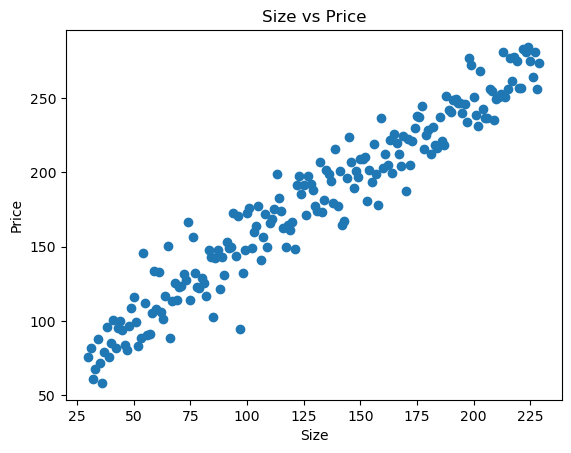

In [4]:
# Create the scatter plot
plt.scatter(x=df_housing_prices['size'], y=df_housing_prices['price'])

# Add labels and title
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Size vs Price')

# Display the plot
plt.show()

### Get the value of m with OLS (Ordinary Least Squares)

In [5]:
X = df_housing_prices['size']
y = df_housing_prices['price']

In [6]:
X_array = np.array(X)
y_array = np.array(y)

# Reshape the data
X_reshaped = X_array.reshape(-1, 1)
y_reshaped = y_array.reshape(-1, 1)

In [7]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# Fit the linear regression model
reg.fit(X_reshaped, y_reshaped)
print(reg.coef_)
print(reg.intercept_)

[[0.98149895]]
[52.47297503]


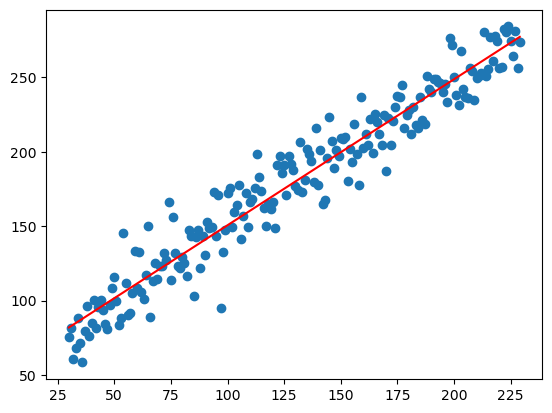

In [8]:
plt.scatter(X_reshaped,y_reshaped)
plt.plot(X_reshaped,reg.predict(X_reshaped),color='red')

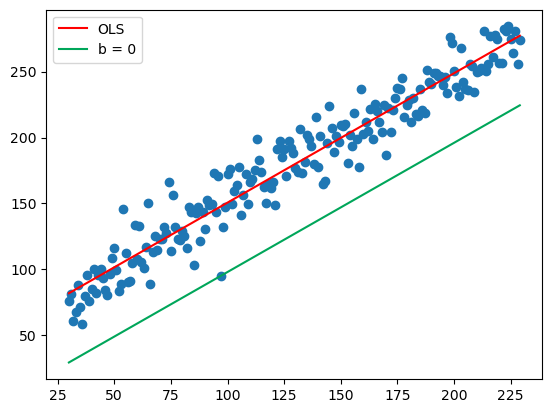

In [9]:
# apply Gradient descent assuming slope is constant at 0.98 and a starting value of intercept b is 0

y_pred = ((0.98 * X_reshaped) + 0)
plt.scatter(X_reshaped,y_reshaped)
plt.plot(X_reshaped,reg.predict(X_reshaped),color='red',label='OLS')
plt.plot(X_reshaped,y_pred,color='#00a65a',label='b = 0')
plt.legend()
plt.show()

In [10]:
m = 0.98
b = 0
loss_slope = -2 * np.sum(y_reshaped - m*X_reshaped.ravel() - b) 
# Assume that we take the learning rate = 0.1
lr = 0.1
step_size = loss_slope*lr
print(step_size)
# Calculating the new intercept
b = b - step_size
print(b)

-421336.7123356348
421336.7123356348


In [11]:
loss_slope = -2 * np.sum(y_reshaped - m*X_reshaped.ravel() - b)
step_size = loss_slope*lr
b = b - step_size
print(b)

-3369851025.2604074


##### The code used above is taken from https://www.analyticsvidhya.com/blog/2021/05/gradient-descent-from-scratch-complete-intuition/

##

---

##

In [12]:
# Convert datadrame to numpy array

X = np.array(df_housing_prices['size'])
X = np.c_[np.ones((X.shape[0], 1)), X]


In [13]:
# create a vector y
vec_y = np.array(df_housing_prices['price'])

# create a vector theta
theta = np.array([0, 0])

In [14]:
def compute_cost(X, y, theta):
    m = X.shape[0]  # Calculate m
    predictions = np.dot(X, theta.reshape(-1, 1))  # Calculate predictions
    cost = 1/(2*m) * np.sum((predictions - vec_y) ** 2)  # Apply cost model
    return cost

In [15]:
# checking for the compute cost
cost_check = compute_cost(X, vec_y, theta)
print(cost_check)

3568156.19224587


In [16]:
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = X.shape[0]  # Calculate m
    costs = []
    for _ in range(num_iterations):

        h = np.dot(X, theta)  # Calculate h

        # loss = h - y  # Loss function (parameter)

        # loss function

        loss = np.dot((h - y), X) / m  # Apply cost model

        cost = compute_cost(X, y, theta)
        costs.append(cost)

        # update theta
        theta = theta - learning_rate * sum(loss)
    return theta, costs


In [17]:
gradient_cost, new_theta = gradient_descent(X, vec_y, theta, 0.0001, num_iterations=200)
print(gradient_cost)
print(new_theta)


[-1654.66106898 -1654.66106898]
[3568156.19224587, 5574858.446843738, 4042346.5786416554, 6218198.849856239, 4594385.361152379, 6955072.634961143, 5236597.761151936, 7799451.832602982, 5983228.859028165, 8767424.809915783, 6850740.382479948, 9877519.05201256, 7858153.209890072, 11151073.340126948, 9027442.618256554, 12612666.898471437, 10383994.385174068, 14290614.243261496, 11957131.100233909, 16217535.807205267, 13780719.478421167, 18431015.958236735, 15893871.12601386, 20974361.813939568, 18341751.122016974, 23897478.309377603, 21176510.984391566, 27257877.347913608, 24458365.135355048, 31121841.600507412, 28256832.91585716, 35565766.67481469, 32652171.585979167, 40677709.015626326, 37737029.65467661, 46559171.0971402, 43618354.388839796, 53327160.31102701, 50419592.550175115, 61116563.54116236, 58283229.405164726, 70082885.86038482, 67373717.97089365, 80405409.21834296, 77880858.43920857, 92290835.56427906, 90023696.9265779, 105977488.73961514, 104055023.31524771, 121740160.8845322

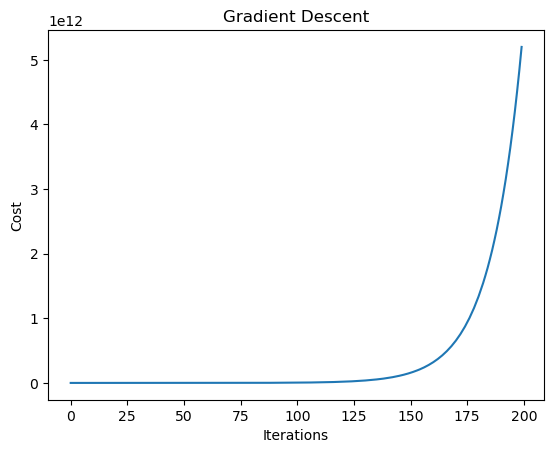

In [19]:
# Visualize the result
plt.plot(new_theta)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

The drop for the housing prices starts to sharply decrease after 175 and it plateaus between the 125 and 150

### code above is generated with the help of: https://towardsdatascience.com/implementing-gradient-descent-in-python-from-scratch-760a8556c31f